In [368]:
#Data Analysis and Visualization Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ML Libs
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [369]:
df = pd.read_csv(r"C:\Users\HP\Downloads\day.csv")

In [370]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [372]:
weather_map = {1 : 'Partly Cloudy',  2 : 'Mist', 3 : 'Light' }
season_map = {1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'}
day_map = { 0 : 'Sun', 1 : 'Mon', 2 : 'Tue', 3 : 'Wed', 4 : 'Thu', 5 : 'Fri', 6 : 'Sat'}
months = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr",5: "May",6: "Jun", 7: "Jul",8: "Aug", 9: "Sep", 10: "Oct",11: "Nov",12: "Dec"}

In [373]:
df['season'] = df['season'].map(season_map)
df['weathersit'] = df['weathersit'].map(weather_map)
df['weekday'] = df['weekday'].map(day_map)
df['mnth'] = df['mnth'].map(months)

In [374]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [375]:
df_encoded = pd.get_dummies(df, columns = ['season', 'weathersit', 'weekday', 'mnth'], drop_first = True)

In [376]:
df_encoded.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,False,False,True,False,False,False,False,False,False,False
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,False,False,True,False,False,False,False,False,False,False
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,False,False,True,False,False,False,False,False,False,False
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,False,False,True,False,False,False,False,False,False,False
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,False,False,True,False,False,False,False,False,False,False


Reason for dropping "casual" and "registered"

 -- We need to consider "cnt" as target variable, but "casual" and "registered" variables also similar to "cnt" because they have just additive relation. So if you keep them and do linear regression, model considers "casual" and "registered" as parameters influencing "cnt". But the basic intuition here is, "casual" and "registered" are similar to target variable "cnt" rather a feature. Hence, dropping them would be obvious in building model

Reson for dropping "instant"

-- As it is just an row number, we need not to consider as feature. So dopping would be obvious

Reson for dropping dteday

-- Already we have several parameters influencing a day, which are like weather status, weekday status. So a mere numerical data not helpful in analysis. So dropping will be fine

In [377]:
df_modified = df_encoded.drop(columns= ['casual', 'registered', 'dteday', 'instant'], axis=1 ).astype(float)

In [378]:
df_modified.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0.0,0.0,0.0,14.110847,18.18125,80.5833,10.749882,985.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,14.902598,17.68695,69.6087,16.652113,801.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,8.050924,9.47025,43.7273,16.636703,1349.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,8.200000,10.60610,59.0435,10.739832,1562.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,9.305237,11.46350,43.6957,12.522300,1600.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train Test Split

In [379]:
df_train, df_test = train_test_split(df_modified, train_size=0.7, random_state= 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


Scaling the features
1. Instantiate an object
2. Create list of numeric variables
3. Fit on data

In [380]:
scaler = MinMaxScaler(feature_range=(0,1))
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
728,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,1.0,0.345824,0.318819,0.751824,0.380981,0.191095,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Training the Model

In [381]:
#correlation of variables
# plt.figure(figsize=(20,20))
# sns.heatmap(df_train.corr(), annot= True, cmap='Greens')
# plt.show()
# df_train.columns.tolist()

Correlation of notable variables with respect to target
1. season_winter - positively less correlated
2. all week days, that is day of the week whether monday or another os very less correlated, so we can drop them

In [382]:
less_correlated_columns = ['weekday_Mon','weekday_Sat','weekday_Sun','weekday_Thu','weekday_Tue','weekday_Wed','season_winter']
df_modified_train = df_train.drop(columns=less_correlated_columns, axis=1)
# plt.figure(figsize=(20,20))
# sns.heatmap(df_modified_train.corr(), annot= True, cmap='Greens')
# plt.show()

Mutually Correlated Columns
"temp" and "atemp" are mutually highly correlated. So we can drop one which is atemp"

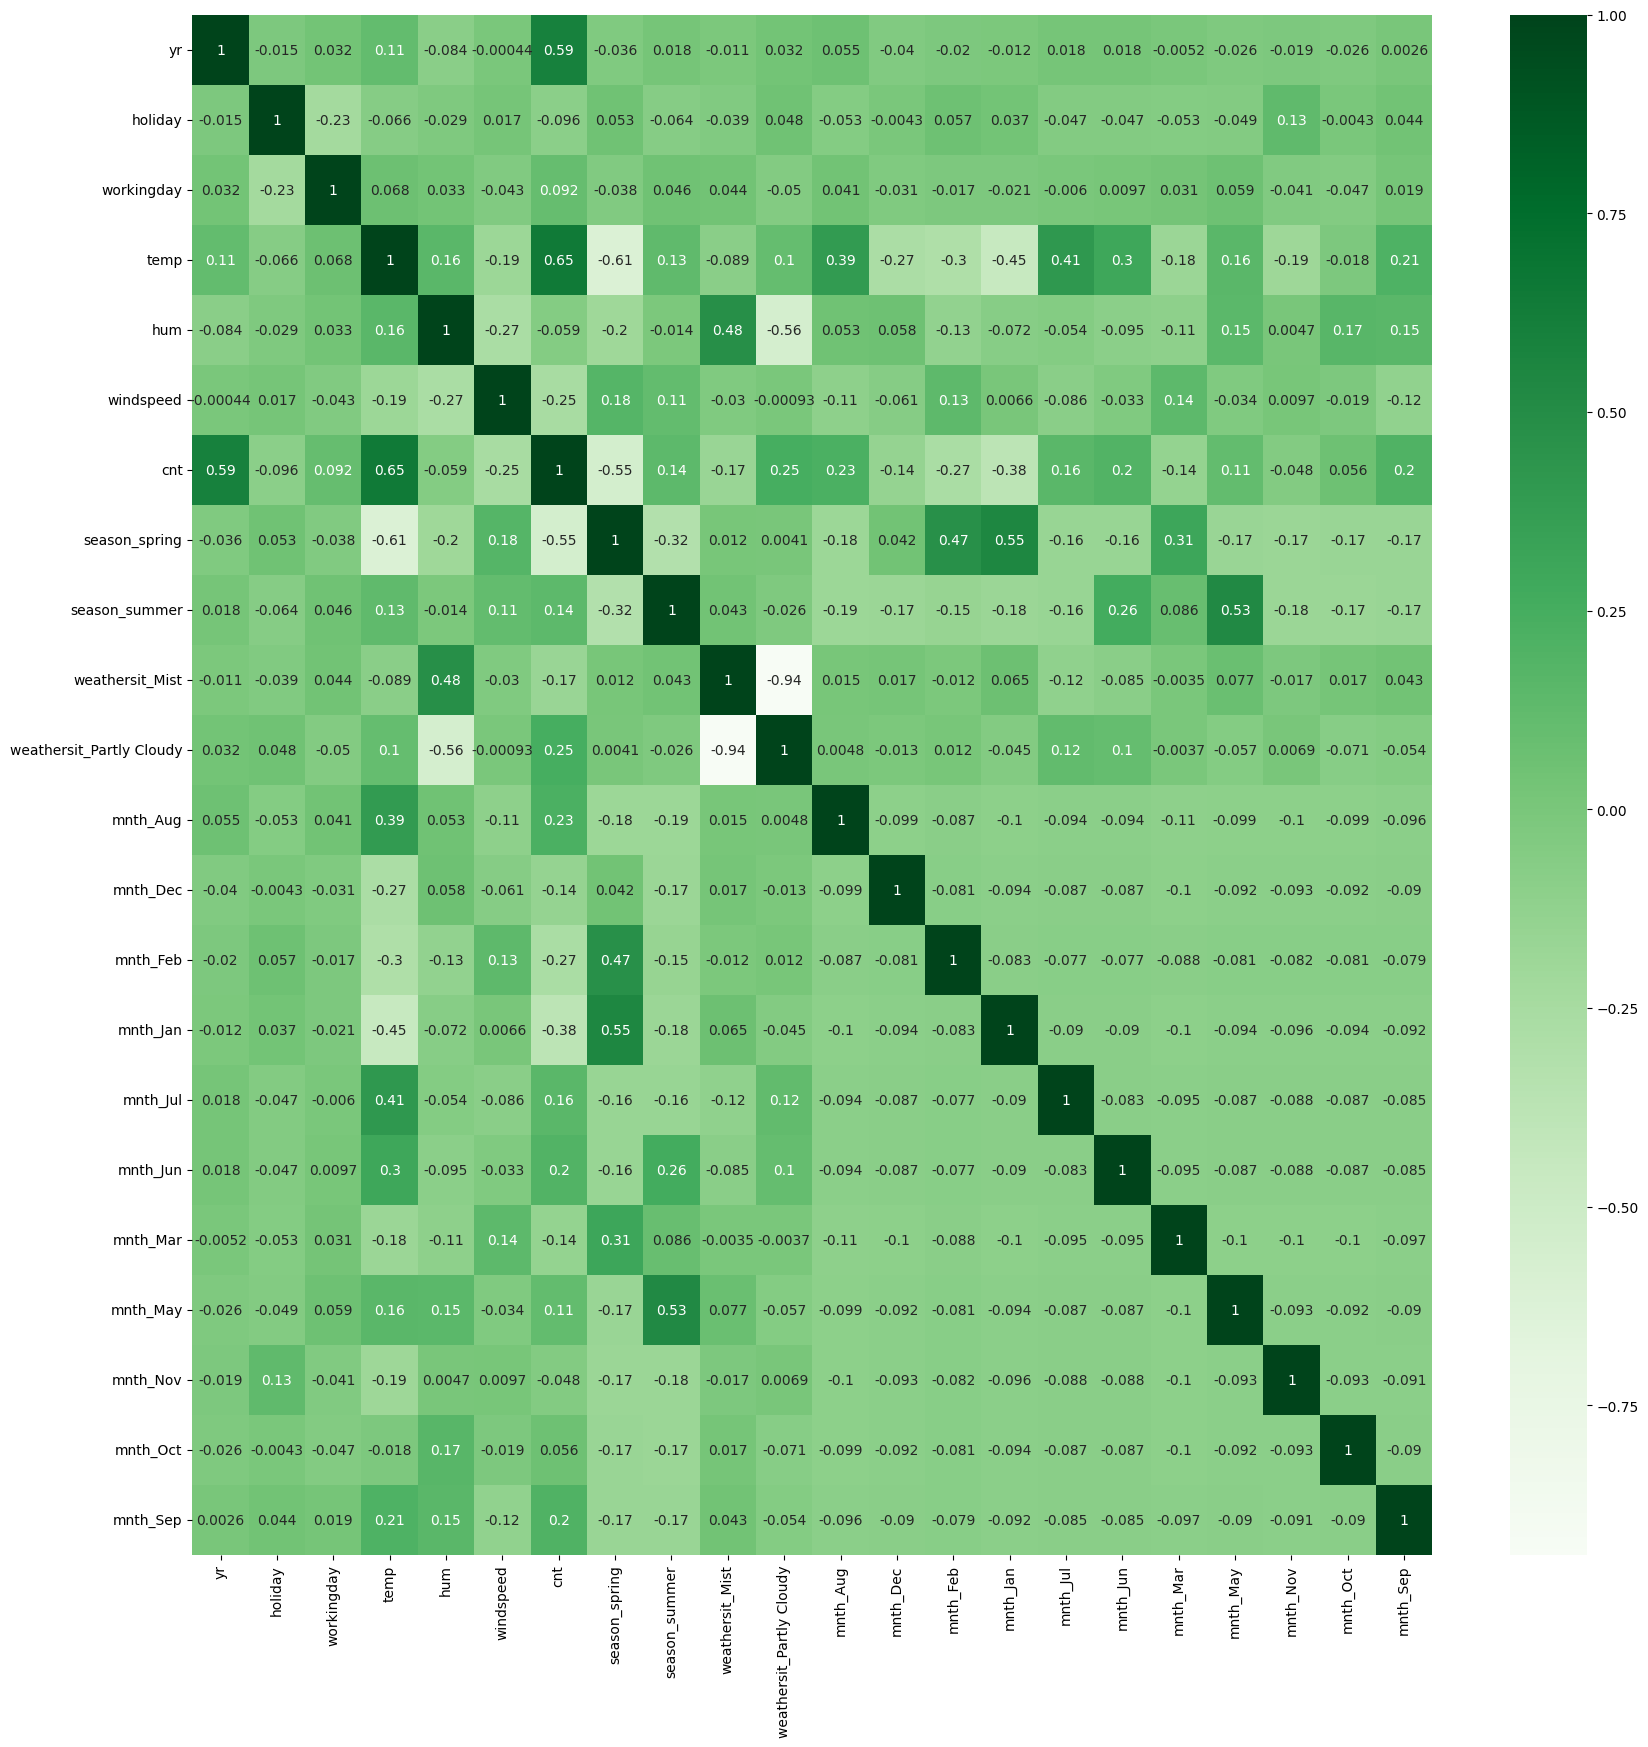

In [383]:
mutually_correlated_columns = ['atemp']
df_modified_train = df_modified_train.drop(columns=mutually_correlated_columns, axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(df_modified_train.corr(), annot= True, cmap='Greens')
plt.show()

Analyze the variables with statsmodel lib

In [384]:
y_train = df_modified_train.pop('cnt')
x_train = df_modified_train
x_train_sm = sm.add_constant(x_train['temp'])
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
print(lr_model.params)
lr_model.summary()

const    0.169031
temp     0.640944
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           2.46e-61
Time:                        08:59:25   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [385]:
x_train_sm = x_train[['temp', 'hum']]
x_train_sm = sm.add_constant(x_train_sm)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
print(lr_model.params)
lr_model.summary()

const    0.318542
temp     0.666068
hum     -0.250606
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     200.8
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           5.99e-65
Time:                        08:59:25   Log-Likelihood:                 187.65
No. Observations:                 510   AIC:                            -369.3
Df Residuals:                     507   BIC:                            -356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3185      0.036      8.769      0.000       0.247       0.390
temp           0.6661      0.033     19.960      0.000       0.601       0.732
hum           -0.2506      0.052     -4.850      0.000      -0.352      -0.149
==============================================================================
Omnibus:                        4.282   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.354
Skew:                           0.078   Prob(JB):                        0.187
Kurtosis:                       2.635   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [386]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
print(lr_model.params)
lr_model.summary()

const                       0.109627
yr                          0.232739
holiday                    -0.082754
workingday                  0.014818
temp                        0.433596
hum                        -0.161114
windspeed                  -0.188604
season_spring              -0.112008
season_summer               0.005875
weathersit_Mist             0.195397
weathersit_Partly Cloudy    0.251459
mnth_Aug                   -0.010144
mnth_Dec                    0.015051
mnth_Feb                   -0.005845
mnth_Jan                   -0.034856
mnth_Jul                   -0.066837
mnth_Jun                   -0.004741
mnth_Mar                    0.022138
mnth_May                    0.026574
mnth_Nov                    0.029753
mnth_Oct                    0.077437
mnth_Sep                    0.077805
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     124.6
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          8.13e-181
Time:                        08:59:25   Log-Likelihood:                 510.80
No. Observations:                 510   AIC:                            -977.6
Df Residuals:                     488   BIC:                            -884.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1096      0.054      2.043      0.042       0.004       0.215
yr                           0.2327      0.008     28.243      0.000       0.217       0.249
holiday                     -0.0828      0.027     -3.089      0.002      -0.135      -0.030
workingday                   0.0148      0.009      1.661      0.097      -0.003       0.032
temp                         0.4336      0.047      9.193      0.000       0.341       0.526
hum                         -0.1611      0.039     -4.102      0.000      -0.238      -0.084
windspeed                   -0.1886      0.026     -7.147      0.000      -0.240      -0.137
season_spring               -0.1120      0.025     -4.561      0.000      -0.160      -0.064
season_summer                0.0059      0.025      0.239      0.811      -0.042       0.054
weathersit_Mist              0.1954      0.025      7.684      0.000       0.145       0.245
weathersit_Partly Cloudy     0.2515      0.027      9.367      0.000       0.199       0.304
mnth_Aug                    -0.0101      0.033     -0.307      0.759      -0.075       0.055
mnth_Dec                     0.0151      0.031      0.479      0.632      -0.047       0.077
mnth_Feb                    -0.0058      0.033     -0.177      0.860      -0.071       0.059
mnth_Jan                    -0.0349      0.034     -1.031      0.303      -0.101       0.032
mnth_Jul                    -0.0668      0.035     -1.932      0.054      -0.135       0.001
mnth_Jun                    -0.0047      0.025     -0.188      0.851      -0.054       0.045
mnth_Mar                     0.0221      0.025      0.895      0.371      -0.026       0.071
mnth_May                     0.0266      0.022      1.232      0.219      -0.016       0.069
mnth_Nov                     0.0298      0.033      0.906      0.365      -0.035       0.094
mnth_Oct                     0.0774      0.032      2.411      0.016       0.014       0.141
mnth_Sep                     0.0778      0.033      2.394      0.017       0.014       0.142
==============================================================================
Omnibus:                       69.177   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.578
Skew:                          -0.673   Prob(JB):                     8.31e-41
Kurtosis:                       5.622   Cond. No.                         39.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [387]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF", ascending=False)
vif

,Features,VIF
3,temp,42.41
4,hum,31.76
9,weathersit_Partly Cloudy,17.65
8,weathersit_Mist,10.10
6,season_spring,8.49
7,season_summer,7.34
10,mnth_Aug,5.87
13,mnth_Jan,5.25
14,mnth_Jul,5.17
5,windspeed,4.91


Analysis before dropping variables

1.p value explains the significance of variable with respect to target variable - <= 0 means highly significant.
2.VIF, multi-collinearity

Drop season_summer and see the summary again

In [388]:
x_train_sm = x_train.drop('season_summer', axis=1)
x_train_sm = sm.add_constant(x_train_sm)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
print(lr_model.params)
lr_model.summary()

const                       0.115445
yr                          0.232752
holiday                    -0.082535
workingday                  0.014770
temp                        0.432073
hum                        -0.160392
windspeed                  -0.188127
season_spring              -0.115329
weathersit_Mist             0.195612
weathersit_Partly Cloudy    0.251676
mnth_Aug                   -0.015534
mnth_Dec                    0.009930
mnth_Feb                   -0.008713
mnth_Jan                   -0.037828
mnth_Jul                   -0.072106
mnth_Jun                   -0.006382
mnth_Mar                    0.020391
mnth_May                    0.026778
mnth_Nov                    0.023706
mnth_Oct                    0.071569
mnth_Sep                    0.072216
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     131.1
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          7.20e-182
Time:                        08:59:25   Log-Likelihood:                 510.77
No. Observations:                 510   AIC:                            -979.5
Df Residuals:                     489   BIC:                            -890.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1154      0.048      2.417      0.016       0.022       0.209
yr                           0.2328      0.008     28.272      0.000       0.217       0.249
holiday                     -0.0825      0.027     -3.086      0.002      -0.135      -0.030
workingday                   0.0148      0.009      1.657      0.098      -0.003       0.032
temp                         0.4321      0.047      9.255      0.000       0.340       0.524
hum                         -0.1604      0.039     -4.099      0.000      -0.237      -0.084
windspeed                   -0.1881      0.026     -7.156      0.000      -0.240      -0.136
season_spring               -0.1153      0.020     -5.703      0.000      -0.155      -0.076
weathersit_Mist              0.1956      0.025      7.704      0.000       0.146       0.245
weathersit_Partly Cloudy     0.2517      0.027      9.389      0.000       0.199       0.304
mnth_Aug                    -0.0155      0.024     -0.645      0.519      -0.063       0.032
mnth_Dec                     0.0099      0.023      0.433      0.665      -0.035       0.055
mnth_Feb                    -0.0087      0.031     -0.283      0.777      -0.069       0.052
mnth_Jan                    -0.0378      0.031     -1.205      0.229      -0.099       0.024
mnth_Jul                    -0.0721      0.027     -2.709      0.007      -0.124      -0.020
mnth_Jun                    -0.0064      0.024     -0.263      0.792      -0.054       0.041
mnth_Mar                     0.0204      0.024      0.864      0.388      -0.026       0.067
mnth_May                     0.0268      0.022      1.244      0.214      -0.016       0.069
mnth_Nov                     0.0237      0.021      1.136      0.257      -0.017       0.065
mnth_Oct                     0.0716      0.021      3.466      0.001       0.031       0.112
mnth_Sep                     0.0722      0.023      3.206      0.001       0.028       0.116
==============================================================================
Omnibus:                       69.067   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.978
Skew:                          -0.671   Prob(JB):                     6.80e-41
Kurtosis:                       5.627   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [389]:
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF", ascending=False)
vif

,Features,VIF
0,const,141.23
9,weathersit_Partly Cloudy,10.42
8,weathersit_Mist,9.02
4,temp,6.87
13,mnth_Jan,4.91
7,season_spring,4.66
12,mnth_Feb,3.64
10,mnth_Aug,3.12
14,mnth_Jul,3.10
16,mnth_Mar,3.05


As month June is highly statistically insignificant, try removing this and analyze values of p and VIF

In [390]:

x_train_sm = x_train_sm.drop(columns=['mnth_Jun','mnth_Feb', 'mnth_Dec', 'mnth_Aug', 'mnth_Jun'], axis=1)
x_train_sm = sm.add_constant(x_train_sm)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
print(lr_model.params)
lr_model.summary()

const                       0.120081
yr                          0.233193
holiday                    -0.081652
workingday                  0.014687
temp                        0.407370
hum                        -0.153985
windspeed                  -0.187513
season_spring              -0.120736
weathersit_Mist             0.196270
weathersit_Partly Cloudy    0.253758
mnth_Jan                   -0.037592
mnth_Jul                   -0.061604
mnth_Mar                    0.023678
mnth_May                    0.031906
mnth_Nov                    0.022653
mnth_Oct                    0.073515
mnth_Sep                    0.078358
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.7
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          5.54e-186
Time:                        08:59:25   Log-Likelihood:                 510.12
No. Observations:                 510   AIC:                            -986.2
Df Residuals:                     493   BIC:                            -914.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1201      0.045      2.645      0.008       0.031       0.209
yr                           0.2332      0.008     28.611      0.000       0.217       0.249
holiday                     -0.0817      0.027     -3.072      0.002      -0.134      -0.029
workingday                   0.0147      0.009      1.655      0.099      -0.003       0.032
temp                         0.4074      0.029     14.239      0.000       0.351       0.464
hum                         -0.1540      0.038     -4.077      0.000      -0.228      -0.080
windspeed                   -0.1875      0.026     -7.284      0.000      -0.238      -0.137
season_spring               -0.1207      0.015     -8.028      0.000      -0.150      -0.091
weathersit_Mist              0.1963      0.025      7.759      0.000       0.147       0.246
weathersit_Partly Cloudy     0.2538      0.027      9.530      0.000       0.201       0.306
mnth_Jan                    -0.0376      0.019     -2.022      0.044      -0.074      -0.001
mnth_Jul                    -0.0616      0.018     -3.494      0.001      -0.096      -0.027
mnth_Mar                     0.0237      0.015      1.542      0.124      -0.006       0.054
mnth_May                     0.0319      0.016      2.028      0.043       0.001       0.063
mnth_Nov                     0.0227      0.017      1.355      0.176      -0.010       0.055
mnth_Oct                     0.0735      0.016      4.572      0.000       0.042       0.105
mnth_Sep                     0.0784      0.016      4.844      0.000       0.047       0.110
==============================================================================
Omnibus:                       69.396   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.475
Skew:                          -0.666   Prob(JB):                     4.35e-42
Kurtosis:                       5.681   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [391]:
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF", ascending=False)
vif

,Features,VIF
0,const,128.26
9,weathersit_Partly Cloudy,10.34
8,weathersit_Mist,9.00
4,temp,2.59
7,season_spring,2.59
5,hum,1.89
10,mnth_Jan,1.73
11,mnth_Jul,1.37
14,mnth_Nov,1.37
12,mnth_Mar,1.30


Tried removing one of "weathersit_Partly Cloudy", "weathersit_Mist", but R-score is dropping as they are statistically significant